# Student Performance Prediction 

###

## 1. Introduction

### 1.1 Context:


     This notebook explores student performance data to identfiy the factors that influence academic outcomes. Through exploratory data analysis (EDA), I examine demographic, academic, and lifestlye features such as gender, income, attendance, gaming hours, and prior grades. After uncovering trends and relationships, I build machine learning models to predict the Overall performance score of students. This process provides insights for educators and serves as a foundation for data-driven interventions to support student sucess.

### 1.2 Problem Statement:


    1. What factors significantly influence students' overall academic performance
    2. Is it possible to build machine learning model to predict a student's Overall performance score based on demographic, academic, and lifestyle features?

### 1.3 Why this is important


Understanding the factors that affect student performance is essentail for improving educational outcomes. By analyzing academic, demographic, and lifestyle data, schools and educators can:
- Identify students who may be at risk underperforming.
- Develop targeted interventions to improve learning outcomes.
- Optimize teaching strategies and resource allocation.
- Use predictive models to support data-driven decision-making in education.

## 2. Objectives

### 2.1 Clear goals of the analysis/model

The primary goal of this analysis is to understand and predict student academic performance. Specifically, this notebook aims to:
1. Explore the dataset through descriptive statistics and visualization to identify patterns, distributions, and relationships among features.
2. Determine the key factors (academic, demographic, lifestlye) that influence the Overall performance score.
3. Preprocess the data by handling categorical features, scaling numerical features, and preparing the dataset for modeling
4. Develop machine learning models to predict a student's Overall performance score.
5. Evaluate model performance using appropriate regression metrics (MAE, RMSE, R^2)
6. Provide actionable insights for educators and decision-makers to support students more effectively

## 3. Data Description

### 3.1 Dataset Source

URL: https://data.mendeley.com/datasets/5b82ytz489/1

### 3.2 Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3.2 Load and Explore the Dataset

In [3]:
df = pd.read_csv('ResearchInformation3.csv')

In [4]:
df.head()

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,No,3,Yes,4th,3.940,3.940


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    object 
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    object 
 8   Gaming       493 non-null    object 
 9   Attendance   493 non-null    object 
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null    object 
 14  Last         493 non-null    float64
 15  Overall      493 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 61.8+ KB


In [6]:
df.describe()

,HSC,SSC,Computer,English,Last,Overall
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,4.156775,4.767647,3.338742,3.569980,3.163888,3.188383
std,0.546504,0.349538,1.252988,0.870515,0.641475,0.591801
min,2.170000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,3.830000,4.680000,3.000000,3.000000,2.810000,2.880000
50%,4.170000,4.940000,3.000000,4.000000,3.250000,3.270000
75%,4.500000,5.000000,4.000000,4.000000,3.670000,3.680000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000


In [7]:
df.shape

(493, 16)

### 3.4 Insights

- 10 object feature and 5 numeric feature
- Spread of data is consistent
- max value of HSC and SSC feature is not the same with the higher education max (4)

## 4. Exploratory Data Analysis (EDA)

### 4.1 Data Cleaning

Handle Missing and duplicate values

In [8]:
df.isna().sum()

Department     0
Gender         0
HSC            0
SSC            0
Income         0
Hometown       0
Computer       0
Preparation    0
Gaming         0
Attendance     0
Job            0
English        0
Extra          0
Semester       0
Last           0
Overall        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

Note: No duplicate and missing values

### 4.2 Univariate Analysis

#### Numerical Features

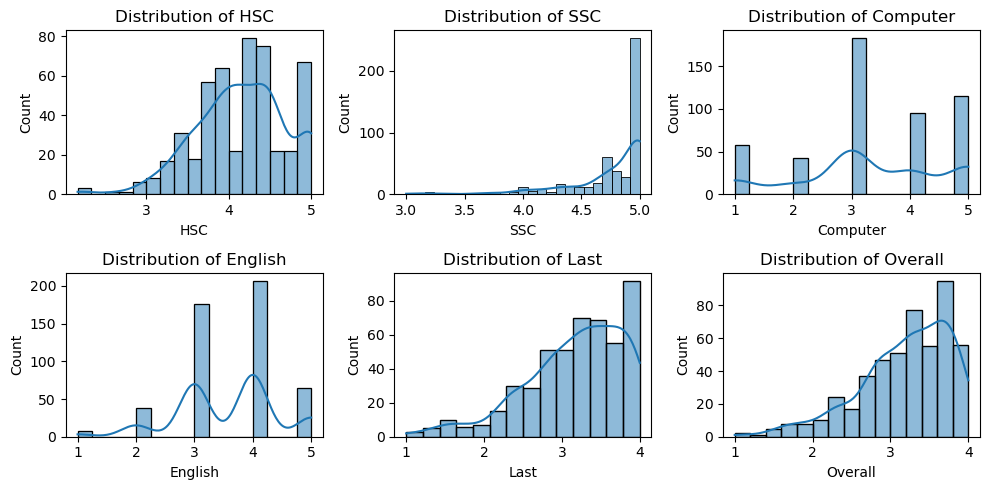

In [10]:
num_cols = df.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(2, 3, figsize=(10,5))
axes = axes.flatten()

for i, feature in enumerate(num_cols):
    sns.histplot(df[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

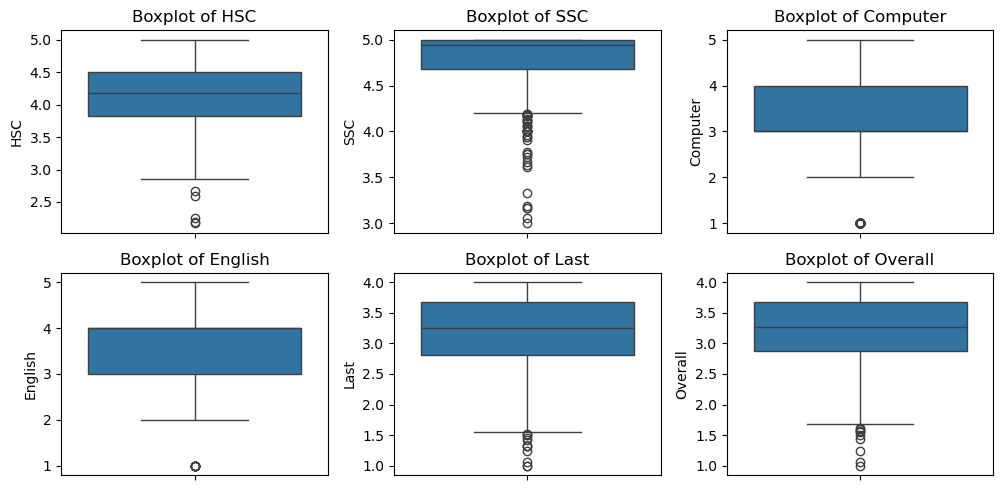

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(10,5))
axes = axes.flatten()

for i, feature in enumerate(num_cols):
    sns.boxplot(df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

#### Categorical Feature

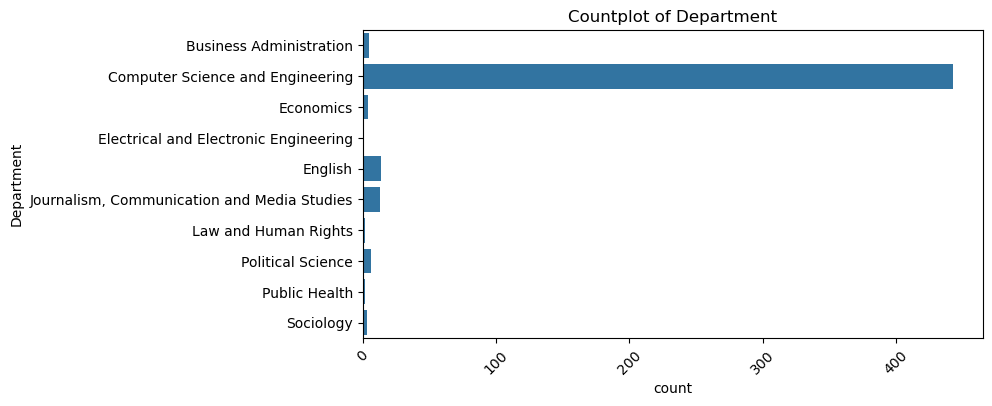

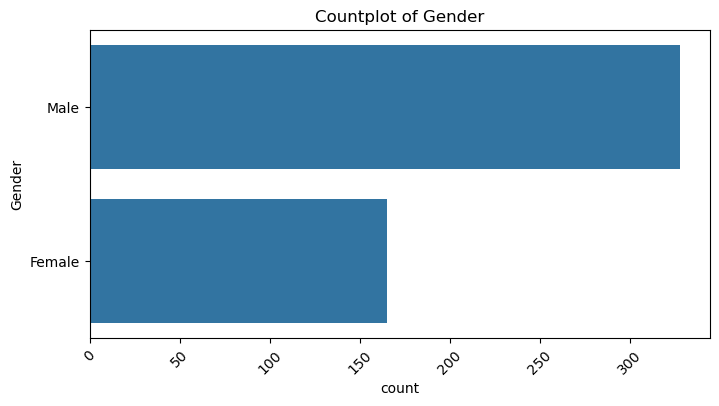

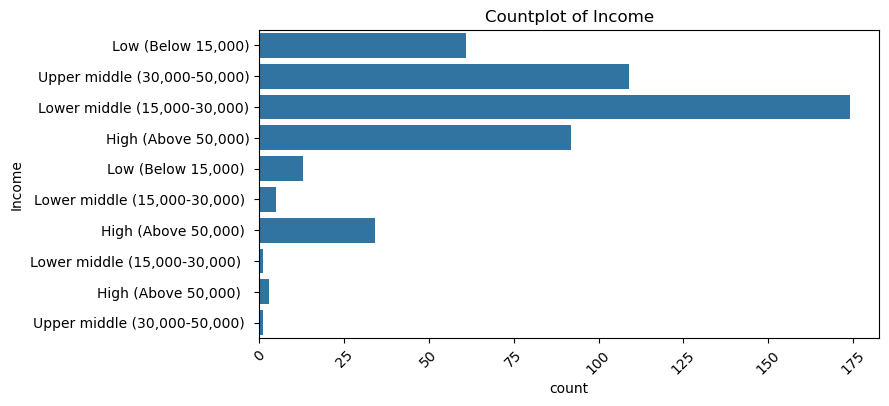

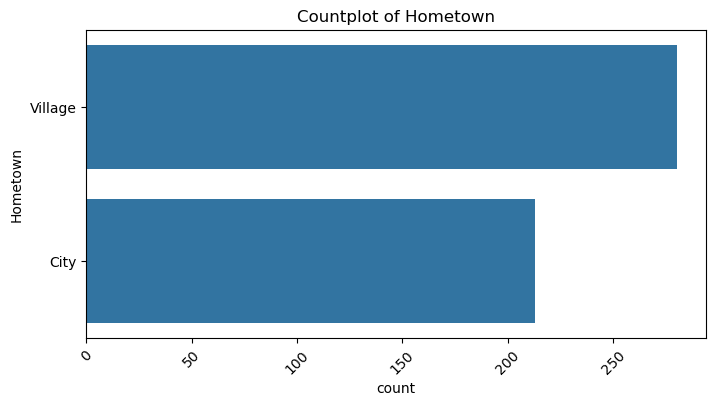

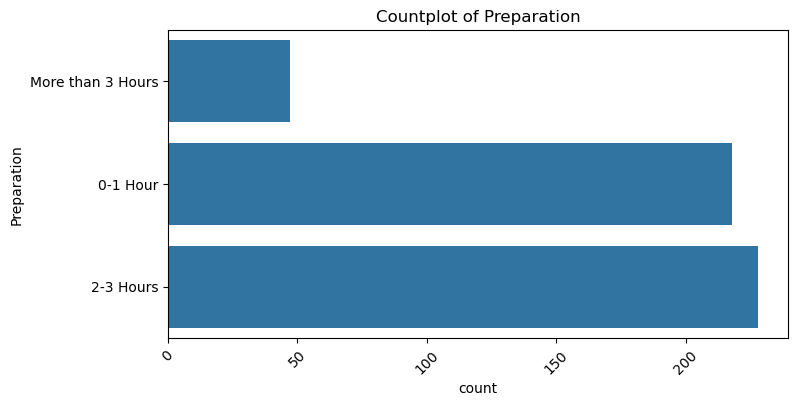

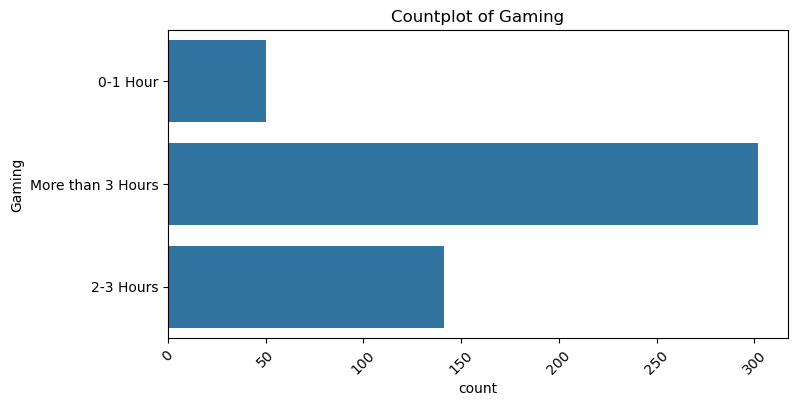

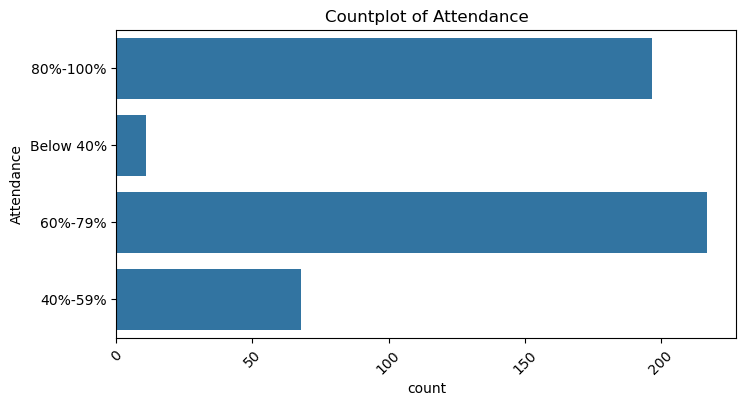

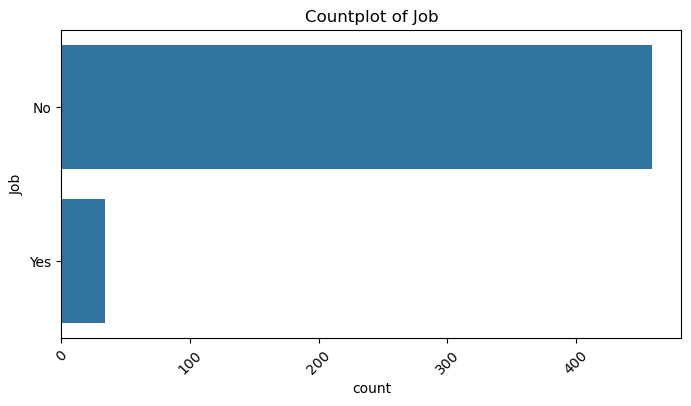

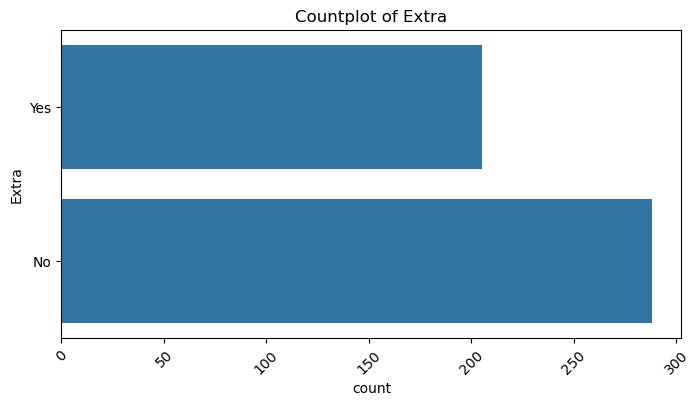

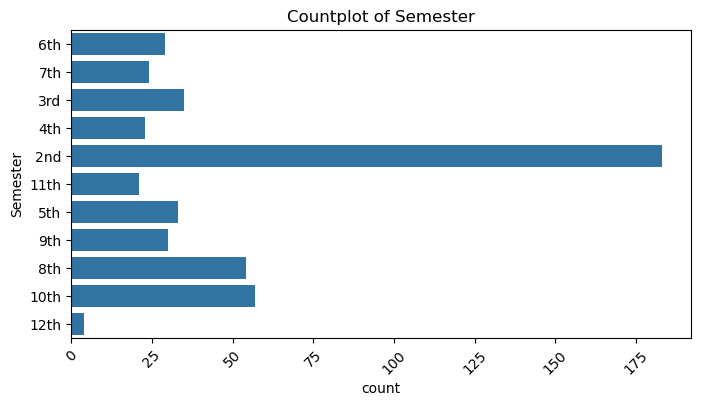

In [12]:
for feature in df.select_dtypes(include='object').columns.tolist():
    plt.figure(figsize=(8,4))
    sns.countplot(df[feature])
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

### 4.3 Bivariate/Multivariate Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    object 
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    object 
 8   Gaming       493 non-null    object 
 9   Attendance   493 non-null    object 
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null    object 
 14  Last         493 non-null    float64
 15  Overall      493 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 61.8+ KB


<Axes: title={'center': 'Average Proficiency in English by Gender'}, xlabel='Gender'>

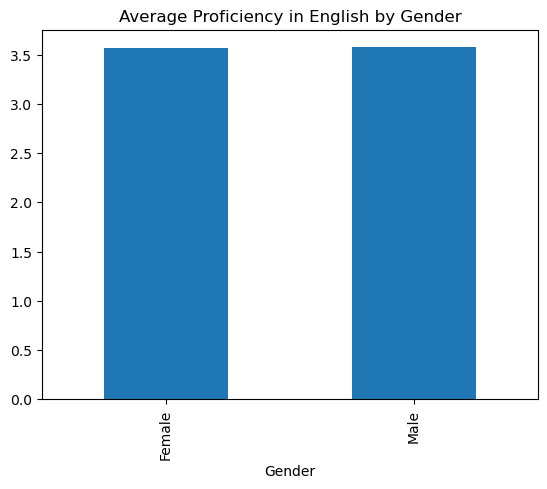

In [14]:
df.groupby('Gender')['English'].mean().plot(kind='bar',title='Average Proficiency in English by Gender')

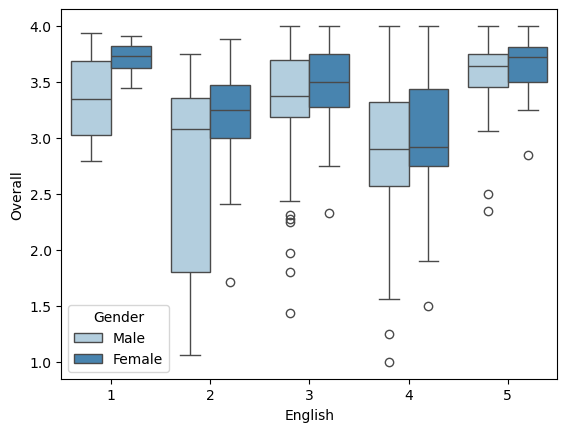

In [15]:
sns.boxplot(x=df['English'], y=df['Overall'],data=df, hue='Gender', palette='Blues')
plt.show()

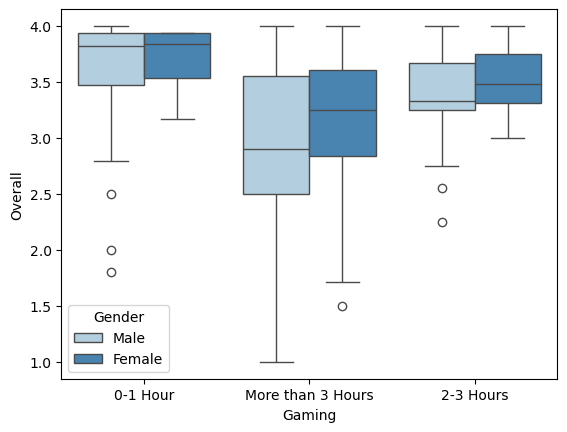

In [16]:
sns.boxplot(data=df, x=df['Gaming'], y=df['Overall'], hue='Gender', palette='Blues')
plt.show()

<Axes: xlabel='Preparation', ylabel='Overall'>

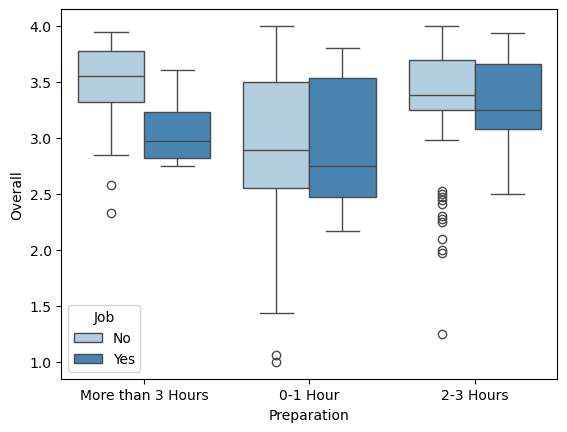

In [17]:
sns.boxplot(data=df, x='Preparation', y='Overall', hue='Job',palette='Blues')

<Axes: xlabel='Extra', ylabel='Overall'>

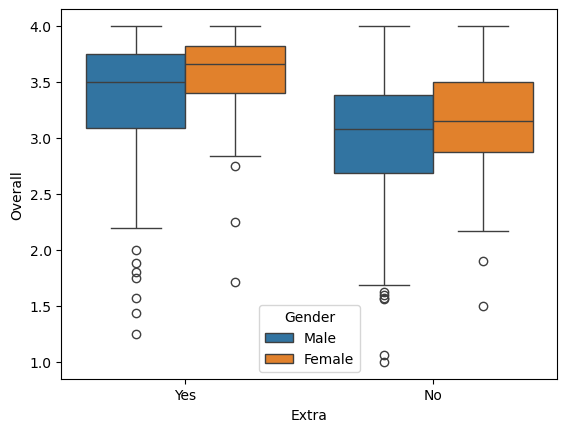

In [18]:
sns.boxplot(data=df, x='Extra', y='Overall', hue='Gender')

Text(0.5, 1.0, 'Impact of Attendance on Overall Grade')

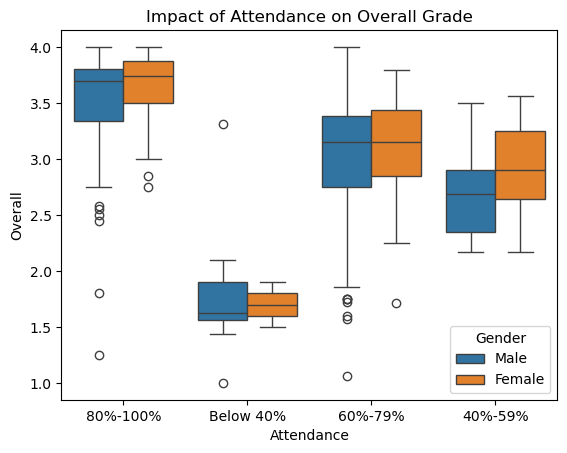

In [19]:
sns.boxplot(data=df, x='Attendance', y='Overall', hue='Gender')
plt.title('Impact of Attendance on Overall Grade')

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
7,Computer Science and Engineering,Male,4.5,4.81,"Upper middle (30,000-50,000)",City,3,2-3 Hours,More than 3 Hours,80%-100%,No,4,Yes,11th,2.95,1.25


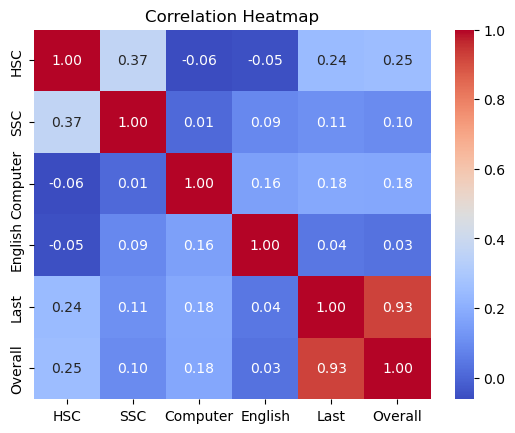

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 5. Feature Engineering

## 6. Model Building

### 6.1 Train-Test Split

### 6.2 Baseline Model

### 6.3 Model Training

### 6.4 Model Evaluation

## 7. Results

## 8. Conclusion & Recommendations

## 9. References